# Лабораторна робота 1

З генеральної сукупності взято вибірку:

In [1]:
import numpy as np

l = """2 2 1 3 4 2 1 1 3 3 4 3 2 4 2 1 4 3 1 4 
       0 4 2 3 4 3 7 1 3 3 3 4 3 2 1 2 3 3 1 5
       3 0 2 1 2 3 0 0 3 6 2 4 3 4 2 4 1 2 0 3
       1 0 0 2"""
a = [int(s) for s in l.split()]
an = np.array(a)
an

array([2, 2, 1, 3, 4, 2, 1, 1, 3, 3, 4, 3, 2, 4, 2, 1, 4, 3, 1, 4, 0, 4, 2,
       3, 4, 3, 7, 1, 3, 3, 3, 4, 3, 2, 1, 2, 3, 3, 1, 5, 3, 0, 2, 1, 2, 3,
       0, 0, 3, 6, 2, 4, 3, 4, 2, 4, 1, 2, 0, 3, 1, 0, 0, 2])

Сумма генеральної сукупності

In [2]:
an.sum()

155

In [3]:
sum(a)

155

1) Запишемо варіаційний ряд

абсолютні частоти

In [4]:
import collections
counter = collections.Counter(an)
l_keys = list(counter.keys())
l_values = list(counter.values()) 
print(l_keys)
print(l_values)

[0, 1, 2, 3, 4, 5, 6, 7]
[7, 11, 14, 18, 11, 1, 1, 1]


In [5]:
hist, bin_edges = np.histogram(an)
print(np.unique(an))
print(hist)

[0 1 2 3 4 5 6 7]
[ 7 11 14  0 18 11  0  1  1  1]


In [6]:
ls = []
print(list(set(an)))
for j in list(set(an)):
    ls.append(np.count_nonzero(an == j))
print(ls)

[0, 1, 2, 3, 4, 5, 6, 7]
[7, 11, 14, 18, 11, 1, 1, 1]


In [7]:
from itertools import groupby
freq = {key:len(list(group)) for key, group in groupby(np.sort(an))}
print(freq)
print(list(freq.keys()))
print(list(freq.values()))

{0: 7, 1: 11, 2: 14, 3: 18, 4: 11, 5: 1, 6: 1, 7: 1}
[0, 1, 2, 3, 4, 5, 6, 7]
[7, 11, 14, 18, 11, 1, 1, 1]


2) Обчислимо моду

In [8]:
from statistics import mode
mode(an)

3

In [9]:
repeticiones = 0
for i in a:
    apariciones = a.count(i)
    if apariciones > repeticiones:
        repeticiones = apariciones

modas = []
for i in a:
    apariciones = a.count(i)
    if apariciones == repeticiones and i not in modas:
        modas.append(i)

print(modas)

[3]


In [10]:
counts = np.bincount(an)
print(np.argmax(counts))

3


Медіана

In [11]:
from statistics import median
print(np.median(an))
print(median(an))

2.5
2.5


Варіаційний ряд відносних частот

In [12]:
print(l_keys)
print(l_values)
l_rel =[]
for i in l_values:
    l_rel.append(round(i / len(an), 3))
print(l_rel)

[0, 1, 2, 3, 4, 5, 6, 7]
[7, 11, 14, 18, 11, 1, 1, 1]
[0.109, 0.172, 0.219, 0.281, 0.172, 0.016, 0.016, 0.016]


In [13]:
print(l_keys)
print(l_values)
l_rel =[]
for i in l_values:
    l_rel.append(i / len(a))
print(np.array(l_rel))

[0, 1, 2, 3, 4, 5, 6, 7]
[7, 11, 14, 18, 11, 1, 1, 1]
[ 0.109375  0.171875  0.21875   0.28125   0.171875  0.015625  0.015625
  0.015625]


Гістограма та полігон абсолютних частот

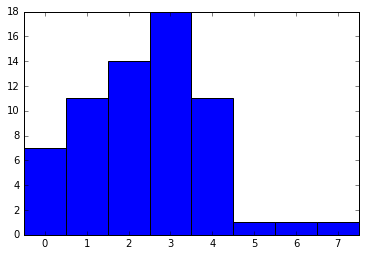

In [14]:
import matplotlib.pyplot as plt
width = 1
plt.bar(list(counter), l_values, width)
plt.xticks(np.arange(len(l_keys)) + width * 0.5, l_keys)
plt.show()

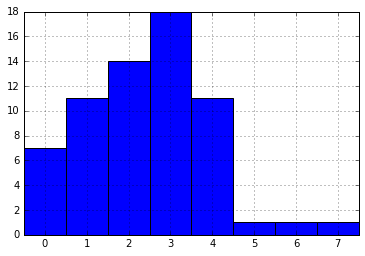

In [15]:
from collections import Counter
labels, values = zip(*Counter(a).items())
indexes = np.arange(len(labels))
width = 1
plt.grid(True)
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

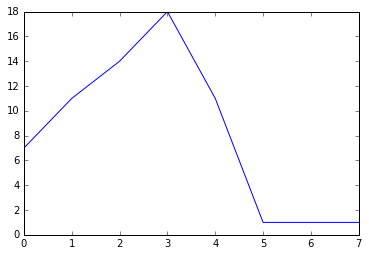

In [16]:
plt.plot(list(counter.keys()), values)
plt.show()

In [17]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
iplot([{"x": list(counter), "y": l_values}])

Гістограма та полігон відносних частот

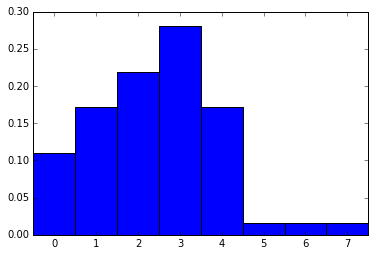

In [18]:
plt.bar(list(counter), l_rel, width)
plt.xticks(np.arange(len(l_keys)) + width * 0.5, l_keys)
plt.show()

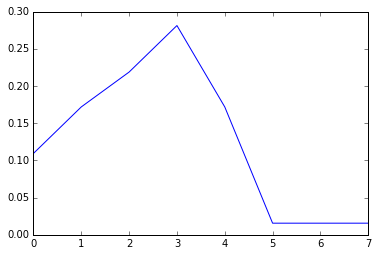

In [19]:
plt.plot(list(counter.keys()), l_rel)
plt.show()

In [20]:
init_notebook_mode(connected=True)
iplot([{"x": list(counter.keys()), "y": l_rel}])

4.1) Вибіркове середнє є незміщеною оцінкою генерального середнього і обчислюються за формулою.
Sample mean and covariance

In [21]:
from statistics import mean
print(mean(a))
print(np.mean(an))

2.421875
2.421875


4.2) Знайдемо незміщену оцінку генеральної дисперсії та середнього квадратичного відхилення:

sample variance

In [22]:
from statistics import variance
print(variance((a)))
print(np.cov(an))

2.2160218253968256
2.216021825396825


Знайдемо середнє відхилення.


mean absolute deviation MAD

In [23]:
n = float(len(an))
mean = sum(an) / n
diff = [abs(x - mean) for x in an]
sum(diff) / n

1.203125

sqrt(Db)

In [24]:
from statistics import pvariance
from math import sqrt
print(sqrt(pvariance((a))))
print(sqrt(np.var(an)))

1.4769551395946323
1.4769551395946323


Знайдемо коефіцієнт варіації V 

Statistical dispersion

In [25]:
print((sqrt(np.var(an)) / np.mean(an)) )

0.60983954151


Накопичені частоти сортовані

In [26]:
ls = []
print(l_rel)
for i in range(len(l_rel)):
    ls.append(sum(l_rel[i:len(l_rel)]))
ls.reverse()

[0.109375, 0.171875, 0.21875, 0.28125, 0.171875, 0.015625, 0.015625, 0.015625]


Накопичені частоти

In [27]:
cumulative_frequencies = np.cumsum(l_rel).round(3)
cumulative_frequencies

array([ 0.109,  0.281,  0.5  ,  0.781,  0.953,  0.969,  0.984,  1.   ])

Складемо другу статистичну таблицю

In [28]:
l_rel = np.array(l_rel).round(3)
import pandas as pd
x = pd.DataFrame({'Варіанта': range(len(l_keys)), 'Абсолютні частоти': list(counter.values()),
                  'Відносні частоти': l_rel, 
                  'Накопичені частоти': cumulative_frequencies})
x

,Абсолютні частоти,Варіанта,Відносні частоти,Накопичені частоти
0,7,0,0.109,0.109
1,11,1,0.172,0.281
2,14,2,0.219,0.500
3,18,3,0.281,0.781
4,11,4,0.172,0.953
5,1,5,0.016,0.969
6,1,6,0.016,0.984
7,1,7,0.016,1.000
